In [1]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import sys
from pathlib import Path
sys.path.append(str(Path().resolve().parents[0]))
import config
import DataLoader
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import itertools
import math

2025-10-03 18:16:08.343 | INFO     | config:<module>:11 - PROJ_ROOT path is: E:\Coding\Python\MachineLearning_SCFA


: 

In [ ]:
df = DataLoader.LoadKNN()
print(df.columns)


Index(['air', 'land', 'naval', 'building', 'tier1', 'tier2', 'tier3', 'color',
       'name', 'session'],
      dtype='object', name=0)


In [ ]:
def prepare(df, cols =[], normalize = False):
    df = df.drop(columns=["name", "session","color"], errors="ignore")  
    if len(cols) > 0:
        df = df[cols]
    if normalize:
        for col in df.columns:
            df[col] = pd.to_numeric(df[col], errors="coerce")

        num_cols = df.select_dtypes(include=[np.number]).columns
        df["Summe"] = df[num_cols].sum(axis=1)
        for col in num_cols:
            df[col] = df[col] / df["Summe"] 
    df.drop(columns=["Summe"], errors="ignore", inplace=True)
    return df
def prep_norm(df):
    df = df.drop(columns=["name", "session", "color", "tier1", "tier2", "tier3", "building"], errors="ignore")
    for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

    num_cols = df.select_dtypes(include=[np.number]).columns
    df["Summe"] = df[num_cols].sum(axis=1)
    for col in num_cols:
        df[col + "_prop"] = df[col] / df["Summe"]

    feature_cols_prop = [col + "_prop" for col in num_cols]
    X_prop = df[feature_cols_prop].copy()
    return X_prop 
    
    
        
data = prep_norm(df)

#print(f"data:\n{data}\ndata2:\n{data2}")


centers_df:
              air      land     naval
Cluster                              
0        0.535620  0.324773  0.139607
1        0.459664  0.350617  0.189719
2        0.491481  0.334473  0.174046
=============== PLOT ===============
Kombinationen: [('air', 'land'), ('air', 'naval'), ('land', 'naval')]


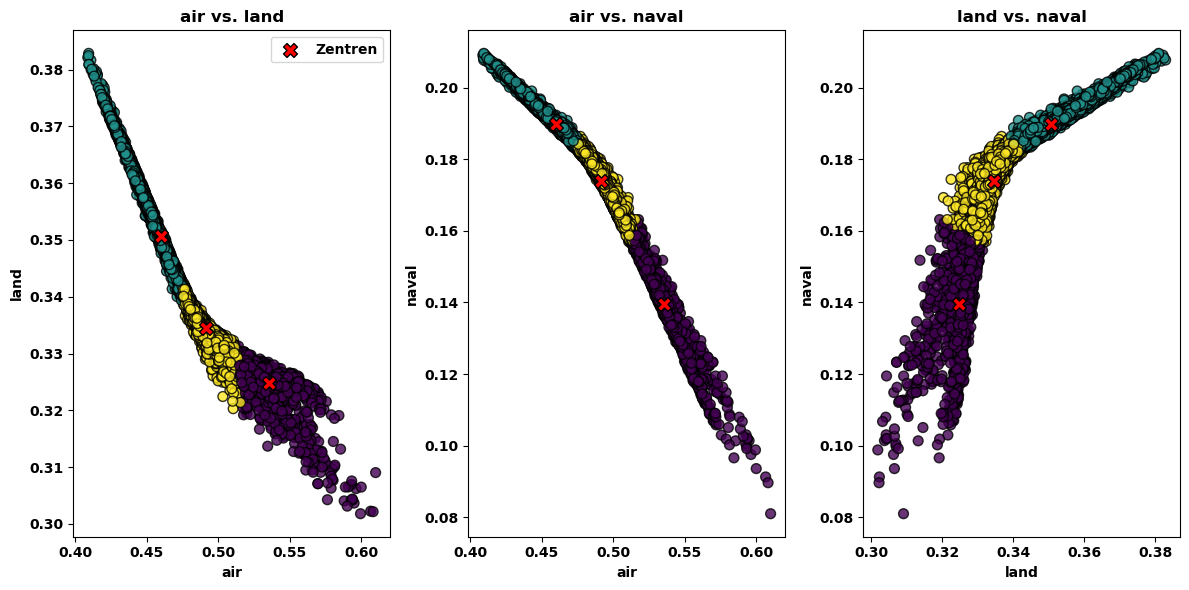

In [ ]:
def cluster_kmeans(K,cols=['air', 'land', 'naval']):
    data = prepare(df,cols = cols, normalize = True)
    columns = data.columns.tolist()
    scaler = StandardScaler()

    kmeans = KMeans(n_clusters=K, random_state=42)
    data['Cluster'] = kmeans.fit_predict(data)
    centers = kmeans.cluster_centers_
    centers_df = pd.DataFrame(centers, columns=columns)
    centers_df.index.name = 'Cluster'
    print(f"centers_df:\n{centers_df}")
    return data, centers_df

def standard_plot(K=3,colss=['air', 'land', 'naval']):
    data, centers_df = cluster_kmeans(K=K, cols=colss)
    columns = data.columns.tolist()
    print("=============== PLOT ===============")


    combinations = list(itertools.combinations(columns, 2))
    combinations = [c for c in combinations if "cluster" not in c[0].lower() and "cluster" not in c[1].lower()]
    num_coms = len(combinations)
    print(f"Kombinationen: {combinations}")


    num_coms = len(combinations)
    cols = 3
    rows = math.ceil(num_coms / cols)
    
    fig, axes = plt.subplots(rows, cols, figsize=(12, num_coms*2)) # Erstellt 1 Zeile, 3 Spalten
    for i, (feat_x, feat_y) in enumerate(combinations):
        if cols <= 3:
            ax = axes[i % cols]
        else:
            ax = axes[i // cols, i % cols]
        # Scatter-Plot der Datenpunkte
        ax.scatter(data[feat_x], data[feat_y],
                    c=data['Cluster'],
                    cmap='viridis',
                    s=50,
                    alpha=0.8,
                    edgecolor='k')

        # Plotten der Cluster-Zentren
        ax.scatter(centers_df[feat_x], centers_df[feat_y],
                    marker='X',
                    s=100,
                    color='red',
                    label='Zentren',
                    edgecolor='black')

        ax.set_xlabel(feat_x)
        ax.set_ylabel(feat_y)
        ax.set_title(f'{feat_x} vs. {feat_y}')
        
        # Zeigt die Legende nur im ersten Plot an
        if i == 0:
            ax.legend()

    plt.tight_layout()
    plt.show()
    plt.close()



standard_plot(K=3, colss = ['air', 'land', 'naval'])
#'air', 'land', 'naval', 'building', 'tier1', 'tier2', 'tier3', 'color','name', 'session'

In [ ]:


def knn1(data):
    for col in data.columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')



    # --- 1. CLUSTERING FUNKTION ---

    def run_clustering(data):
        """Führt K-Means Clustering auf den proportionalen Anteilen aus und plottet 3D."""

        feature_cols_prop = ['air_prop', 'land_prop', 'naval_prop']
        X_prop = data[feature_cols_prop].copy()
        K = 3

        # K-Means Clustering
        kmeans = KMeans(n_clusters=K, random_state=42, n_init=10)
        data['Cluster'] = kmeans.fit_predict(X_prop)
        data['Cluster'] = data['Cluster'].astype(int)
        centers_prop = kmeans.cluster_centers_

        print("--- Cluster-Zentren (proportionale Anteile in %) ---")
        centers_df = pd.DataFrame(centers_prop, columns=feature_cols_prop)
        centers_df.index.name = 'Cluster'
        print((centers_df * 100).round(2))

        # --- 3D-Plot ---
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')

        # Scatter-Plot der Datenpunkte
        scatter = ax.scatter(
            data['land_prop'].values,  # X-Achse
            data['naval_prop'].values, # Y-Achse
            data['air_prop'].values,   # Z-Achse
            c=data['Cluster'].values,
            cmap='viridis',
            s=100,
            edgecolor='k'
        )

        # Plotten der Cluster-Zentren
        ax.scatter(centers_prop[:, 1], centers_prop[:, 2], centers_prop[:, 0],
                marker='X',
                s=350,
                c='red',
                label='Zentren',
                edgecolor='black',
                linewidth=2)

        # Achsen-Labels und Titel
        ax.set_xlabel('LAND Anteil')
        ax.set_ylabel('NAVAL Anteil')
        ax.set_zlabel('AIR Anteil')
        plt.title(f'3D-Clustering der Proportionalen Anteile ({K} Kategorien)', fontsize=14)

        # Farblegende und Zentren-Legende
        fig.colorbar(scatter, ax=ax, shrink=0.7, aspect=10).set_label('Cluster-ID')
        ax.legend(['Cluster Centroids'], loc='lower right')

        plt.show()
        plt.close() # Schließt die Matplotlib-Figur im Hintergrund

        return data, centers_prop, feature_cols_prop, K

    # Führe das Clustering aus und speichere die Ergebnisse
    data_clustered, centers_prop, feature_cols_prop, K = run_clustering(data)


    # --- 2. 2D PLOTS FÜR ALLE KOMBINATIONEN ---

    def plot_2d_combinations(data, centers_prop, feature_cols_prop, K):
        """Erstellt 2D-Scatter-Plots für alle feature_cols_prop-Kombinationen."""

        combinations = [
            ('land_prop', 'naval_prop'),
            ('air_prop', 'naval_prop'),
            ('air_prop', 'land_prop')
        ]
        
        centers_df = pd.DataFrame(centers_prop, columns=feature_cols_prop)

        plt.figure(figsize=(15, 5)) # Große Figur für 3 Subplots

        for i, (feat_x, feat_y) in enumerate(combinations):
            plt.subplot(1, 3, i + 1) # Erstellt 1 Zeile, 3 Spalten

            # Scatter-Plot der Datenpunkte
            plt.scatter(data[feat_x], data[feat_y],
                        c=data['Cluster'],
                        cmap='viridis',
                        s=50,
                        alpha=0.8,
                        edgecolor='k')

            # Plotten der Cluster-Zentren
            plt.scatter(centers_df[feat_x], centers_df[feat_y],
                        marker='X',
                        s=200,
                        color='red',
                        label='Zentren',
                        edgecolor='black')

            plt.xlabel(feat_x.replace('_prop', ' Anteil'))
            plt.ylabel(feat_y.replace('_prop', ' Anteil'))
            plt.title(f'Cluster: {feat_x} vs. {feat_y}')
            
            # Zeigt die Legende nur im ersten Plot an
            if i == 0:
                plt.legend()

        plt.tight_layout()
        plt.show()
        plt.close()
    plot_2d_combinations(data_clustered, centers_prop, feature_cols_prop, K)
    
knn1(data2)

KeyError: "None of [Index(['air_prop', 'land_prop', 'naval_prop'], dtype='object', name=0)] are in the [columns]"